#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.


### Chapter 24
**CH24A Estimating the effect of the 2010 Haiti earthquake on GDP**

using the haiti-earthquake dataset

version 0.9 2020-09-11

In [5]:
pip install git+https://github.com/gnazareths/synth.git

  Cloning https://github.com/gnazareths/synth.git to /private/var/folders/qz/88160n_50vxf3cjj4g40b5nw0000gn/T/pip-req-build-tkdmfolp
    ERROR: Command errored out with exit status 1:
     command: /usr/local/opt/python@3.8/bin/python3.8 -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/qz/88160n_50vxf3cjj4g40b5nw0000gn/T/pip-req-build-tkdmfolp/setup.py'"'"'; __file__='"'"'/private/var/folders/qz/88160n_50vxf3cjj4g40b5nw0000gn/T/pip-req-build-tkdmfolp/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/qz/88160n_50vxf3cjj4g40b5nw0000gn/T/pip-pip-egg-info-04g9lz8f
         cwd: /private/var/folders/qz/88160n_50vxf3cjj4g40b5nw0000gn/T/pip-req-build-tkdmfolp/
    Complete output (7 lines):
    running egg_info
    creating /private/var/folders/qz/88160n_50vxf3cjj4g40b5nw0000gn/T/pip-pip-egg-info-04g9

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from plotnine import *
import os
import sys
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
#import synth

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = "/".join(current_path.split("/")[:-2]) + "/"

# location folders
data_in = dirname + "da_data_repo/haiti-earthquake/clean/"
data_out = dirname + "da_case_studies/ch24-haiti-earthquake-gdp/"
output = dirname + "da_case_studies/ch24-haiti-earthquake-gdp/output/"

func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions 
from py_helper_functions import *

In [4]:
# Loading and preparing data
data = pd.read_stata(data_in + "haiti-earthquake-mod.dta")

In [5]:
dp_countries = [
    "Haiti",
    "Benin",
    "Burkina Faso",
    "Burundi",
    "Bangladesh",
    "Cambodia",
    "Cameroon",
    "Kenya",
    "Kyrgyz Republic",
    "Liberia",
    "Madagascar",
    "Mali",
    "Moldova",
    "Mozambique",
    "Nicaragua",
    "Nepal",
    "Rwanda",
    "Senegal",
    "Sierra Leone",
    "Sudan",
    "Tanzania",
    "Togo",
    "Uganda",
]

In [6]:
data["dp"] = np.where(data["country"].isin(dp_countries), 1, 0)

In [7]:
data = data.query("dp == 1")

In [8]:
tsdata = data.query("country == 'Haiti'")

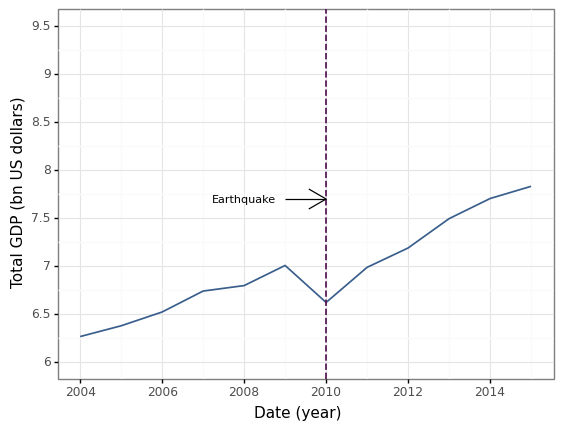

<ggplot: (312026941)>

In [9]:
ggplot(tsdata, aes(x="year", y="gdptb_us")) + geom_line(
    color=color[0], size=0.7
) + geom_vline(xintercept=2010, color=color[2], size=0.7, linetype="dashed") + labs(
    y="Total GDP (bn US dollars)", x="Date (year)"
) + scale_y_continuous(
    breaks=np.arange(6, 10, 0.5), limits=(6, 9.5)
) + scale_x_continuous(
    breaks=np.arange(2004, 2016, 2), limits=(2004, 2015)
) + annotate(
    geom="segment", x=2009, y=7.7, xend=2010, yend=7.7, arrow=arrow()
) + annotate(
    geom="text", x=2008, y=7.7, label="Earthquake", size=8
) + theme_bw()

**use synthetic control results from stata for figures**

In [10]:
data_helper = pd.read_stata(data_out+"temp/gdp-1-temp.dta")

data_helper = pd.melt(data_helper,["year"])

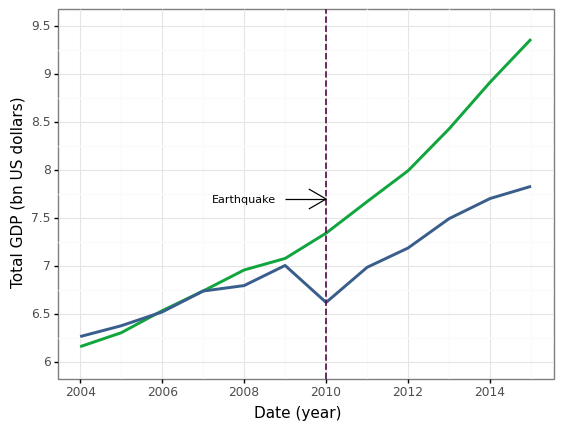

<ggplot: (312173975)>

In [11]:
# figure with total GDP in Haiti and synthetid control
# line _Y_treated _Y_synth _time, lw(vthick vthick) lc(blue mint) ///

ggplot(data_helper, aes(x="year", y="value", color="variable")) + geom_line(
    size=1.2
) + scale_color_manual(values=[color[1], color[0]], guide=False,) + geom_vline(
    xintercept=2010, color=color[2], size=0.7, linetype="dashed"
) + labs(
    y="Total GDP (bn US dollars)", x="Date (year)"
) + scale_y_continuous(
    breaks=np.arange(6, 10, 0.5), limits=(6, 9.5)
) + scale_x_continuous(
    breaks=np.arange(2004, 2016, 2), limits=(2004, 2015)
) + annotate(
    geom="segment", x=2009, y=7.7, xend=2010, yend=7.7, arrow=arrow()
) + annotate(
    geom="text", x=2008, y=7.7, label="Earthquake", size=8
) + theme_bw()

In [12]:
data_helper = pd.read_stata(data_out+"temp/gdp-1-temp.dta")


data_helper["ln_difference"] = np.log(data_helper["Ytreated"]) - np.log(
    data_helper["Ysynthetic"]
)

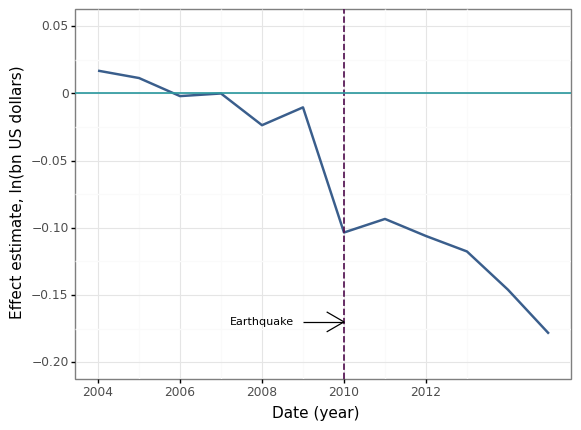

<ggplot: (312126446)>

In [13]:
ggplot(data_helper, aes(x="year", y="ln_difference")) + geom_line(
    color=color[0], size=1
) + geom_vline(
    xintercept=2010, color=color[2], size=0.7, linetype="dashed"
) + geom_hline(
    yintercept=0, color=color[4], size=0.7
) + labs(
    y="Effect estimate, ln(bn US dollars)", x="Date (year)"
) + annotate(
    geom="segment", x=2009, y=-0.17, xend=2010, yend=-0.17, arrow=arrow()
) + annotate(
    geom="text", x=2008, y=-0.17, label="Earthquake", size=8
) + scale_y_continuous(
    breaks=np.arange(-0.2, 0.1, 0.05), limits=(-0.2, 0.05)
) + scale_x_continuous(
    breaks=np.arange(2004, 2014, 2), limits=(2004, 2015)
) + theme_bw()